# CDF Bound Example

## Empirical CDF

The empirical CDF $\hat{F}(x)$ converges to the true CDF $F(x)$ almost surely by [Glivenko–Cantelli theorem](https://en.wikipedia.org/wiki/Glivenko%E2%80%93Cantelli_theorem) and [Dvoretzky–Kiefer–Wolfowitz inequality](https://en.wikipedia.org/wiki/Dvoretzky%E2%80%93Kiefer%E2%80%93Wolfowitz_inequality).

$$
\hat{F}(x) := \frac{1}{n} \sum_{i=1}^{n} \mathbf{1}(Z_i \leq x) \rightarrow F(x) \quad \text{as} \quad n\rightarrow \infty
$$

## 90 % confidence band of CDF F(z) of Z ~ N(0,1)

Let $Z_1, Z_2, \dots, Z_n \overset{\text{iid}}{\sim} N(0,1)$

**Confidence band** $C$  for the CDF $F$ is defined as:

$$
C = (L(x), U(x))
$$

where

$$
\begin{eqnarray*}
L(x) & = & \hat{F}(x) - \epsilon \\ 
U(x) & = & \hat{F}(x) + \epsilon
\end{eqnarray*}
$$

with

$$ \epsilon = \sqrt{\frac{\log \left( \frac{2}{\alpha} \right)}{2n}}$$

In this case, $\epsilon$ is common for all $x$.


This confidence band $C$, known as **the Kolmogorov–Smirnov confidence band**, is derived by [Dvoretzky–Kiefer–Wolfowitz inequality](https://en.wikipedia.org/wiki/Dvoretzky%E2%80%93Kiefer%E2%80%93Wolfowitz_inequality),which provides a nonparametric bound for the difference between the empirical distribution function $\hat{F_n}(x)$ and the true CDF $F(x)$.

## Reference
* All of Statistics: A Concise Course in Statistical Inference 

## Example: Confidence band

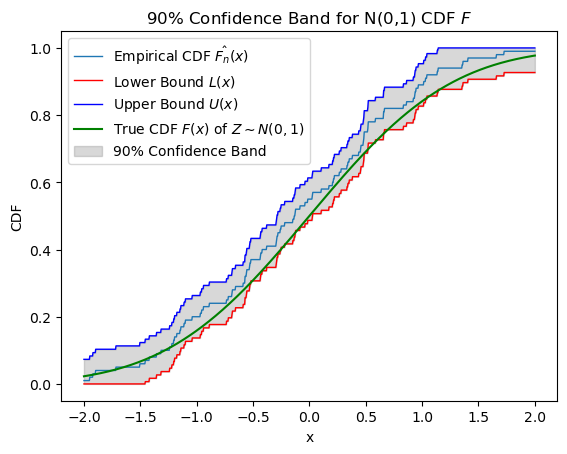

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# create empirical CDF 
x = np.linspace(-2,2,1000) # x axis values
n = 100 #  number of samples
alpha = 0.9 # confidence level
epsilon = np.sqrt(np.log(2/alpha)/(2*n))
z = stats.norm.rvs(loc=0, scale=1, size=n)
Z = np.tile(z, (len(x), 1))
X = np.tile(x,(n, 1)).T
cdf = (Z < X).mean(axis=1) # empirical CDF Fhat(x)

# lower bound
l = cdf.copy() - epsilon
l[l<=0] = 0

# upper bound
u = cdf.copy() + epsilon
u[u>1] = 1 

# true CDF
real_cdf = stats.norm.cdf(x)

# Plotting
fig, ax = plt.subplots()
ax.plot(x, cdf, label="Empirical CDF $\\hat{F_n}(x)$", linewidth=1)
ax.plot(x, l, label="Lower Bound $L(x)$", linestyle='-', color='red', linewidth=1)
ax.plot(x, u, label="Upper Bound $U(x)$", linestyle='-', color='blue', linewidth=1)
ax.plot(x, real_cdf, label="True CDF $F(x)$ of $Z \\sim N(0,1)$", color='green')
ax.fill_between(x, l, u, color='grey', alpha=0.3, label='90% Confidence Band')
ax.set_title("90% Confidence Band for N(0,1) CDF $F$")
ax.set_xlabel("x")
ax.set_ylabel("CDF")
ax.legend()
plt.show()
ax.legend()